In [5]:
import torch
from torchvision import datasets, transforms

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
train_dataset = datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

In [8]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
train_dataset.train_data.float().mean()/255

C:\Users\BM\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor(0.2860)

In [10]:
train_dataset.train_data.float().std()/255

tensor(0.3530)

In [11]:
fashion_mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.2860,),std=(0.3530,))
])

In [12]:
train_dataset = datasets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=fashion_mnist_transform,
                            download=True)

In [13]:
test_dataset = datasets.FashionMNIST(root='./data', 
                            train=False, 
                            transform=fashion_mnist_transform,
                            download=True)

In [14]:
import torch.nn as nn
import numpy as np

In [15]:
epochs=10

In [16]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [58]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        
        # Linear Function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # Non-Linearity
        self.ReLU = nn.ReLU()
        
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Linear function 
        out = self.fc1(x)
        
        # Non-Linearity
        out = self.ReLU(out)
        
        # Linear function (readout)
        out = self.fc2(out)
        
        return out

In [59]:

model = FNN(28*28,100,10)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

train_accuracy_list=[]
test_accuracy_list=[]
train_loss_list=[]
test_loss_list=[]


for i in range(epochs):
    running_loss =0

    correct = 0
    total = 0
    count=0
    accuracy=[]
    for (x,y) in train_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    train_loss= running_loss / len(train_loader)
    train_loss_list.append(train_loss.cpu().detach().numpy())
    train_accuracy= sum(accuracy) / count
    train_accuracy_list.append(train_accuracy)
    print("train / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,train_loss,train_accuracy))     
    
    running_loss =0
    correct = 0
    total = 0
    count=0
    accuracy=[]
    
    for (x,y) in test_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    test_loss= running_loss / len(test_loader)
    test_loss_list.append(test_loss.cpu().detach().numpy())
    test_accuracy= sum(accuracy) / count
    test_accuracy_list.append(test_accuracy)
    print("test / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,loss.item(),test_accuracy))     
          
        

train / epoch: 1, Loss: 0.49802079796791077, Accuracy: 77.9512522085399
test / epoch: 1, Loss: 0.526214599609375, Accuracy: 83.70999886879636
train / epoch: 2, Loss: 0.41784918308258057, Accuracy: 85.24100238382994
test / epoch: 2, Loss: 0.5149700045585632, Accuracy: 85.24280702581547
train / epoch: 3, Loss: 0.39621758460998535, Accuracy: 85.72571010913002
test / epoch: 3, Loss: 0.5361788868904114, Accuracy: 85.24498000619263
train / epoch: 4, Loss: 0.38193291425704956, Accuracy: 86.59149122931998
test / epoch: 4, Loss: 0.4921766519546509, Accuracy: 85.54292290303151
train / epoch: 5, Loss: 0.37395185232162476, Accuracy: 86.41536867586395
test / epoch: 5, Loss: 0.40042418241500854, Accuracy: 86.06717052926626
train / epoch: 6, Loss: 0.37724441289901733, Accuracy: 86.95389378922621
test / epoch: 6, Loss: 0.3751342296600342, Accuracy: 86.22384356352534
train / epoch: 7, Loss: 0.36869126558303833, Accuracy: 87.03320187999198
test / epoch: 7, Loss: 0.41499167680740356, Accuracy: 86.9778559

In [61]:
predicted.cpu().detach().numpy()

tensor([6, 3, 0, 8, 4, 7, 5, 5, 7, 0, 7, 9, 4, 3, 2, 9, 6, 9, 1, 8, 8, 8, 5, 8,
        3, 8, 9, 3, 0, 0, 2, 1, 8, 4, 6, 0, 0, 9, 5, 4, 1, 5, 1, 3, 5, 6, 6, 2,
        1, 7, 3, 0, 8, 2, 9, 0, 9, 0, 0, 4, 1, 2, 6, 4, 5, 1, 4, 9, 7, 8, 2, 6,
        0, 9, 7, 8, 5, 0, 9, 0, 0, 0, 8, 1, 3, 2, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9,
        1, 8, 1, 5], device='cuda:0')

In [62]:
y.cpu().detach().numpy()

tensor([6, 3, 0, 8, 6, 7, 5, 5, 7, 0, 7, 9, 4, 4, 2, 9, 1, 7, 1, 8, 8, 8, 5, 8,
        3, 8, 9, 3, 0, 0, 2, 1, 8, 4, 4, 0, 0, 9, 5, 3, 1, 5, 1, 3, 5, 0, 2, 6,
        1, 5, 3, 0, 8, 6, 9, 6, 9, 6, 0, 4, 1, 6, 6, 4, 9, 1, 4, 9, 7, 8, 2, 6,
        2, 9, 7, 8, 5, 6, 9, 6, 0, 0, 8, 1, 3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9,
        1, 8, 1, 5], device='cuda:0')

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y.cpu().detach().numpy(),predicted.cpu().detach().numpy())
cm

array([[10,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  4,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  6,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  5,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  1,  0,  0],
       [ 4,  0,  3,  0,  1,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 11]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

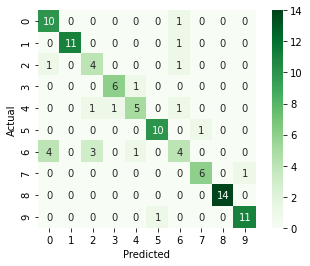

In [72]:
import seaborn as sns
class_names = [i for i in range(10)]
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names, fmt='.0f')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [60]:
model.predict(test_loader)


AttributeError: 'FNN' object has no attribute 'predict'

In [19]:
import matplotlib.pyplot as plt
import numpy as np

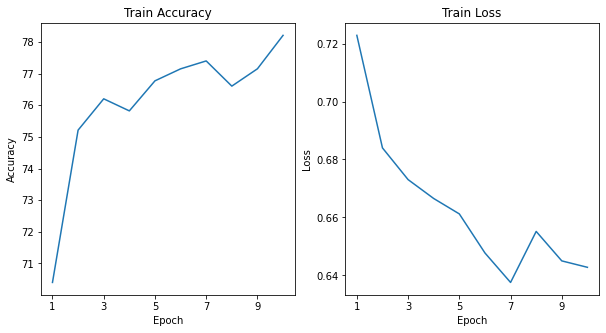

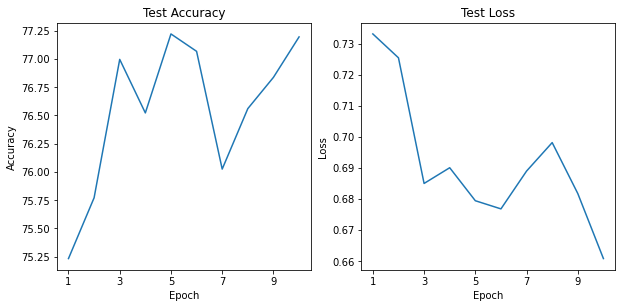

In [52]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.plot(x,train_accuracy_list) 

plt.subplot(1,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Train Loss')
plt.plot(x,train_loss_list) 
plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.plot(x,test_accuracy_list) 

plt.subplot(2,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Test Loss')
plt.plot(x,test_loss_list) 

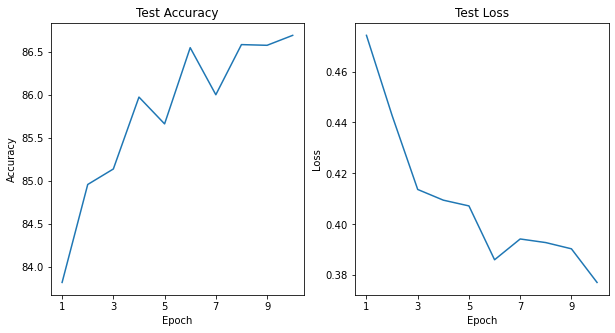

In [37]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.plot(x,test_accuracy_list) 

plt.subplot(1,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Test Loss')
plt.plot(x,test_loss_list) 

In [41]:
class FNN_dropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN_dropout,self).__init__()
        
        # Linear Function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # Non-Linearity
        self.ReLU = nn.ReLU()

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        # Linear function 
        out = self.fc1(x)
        out = self.dropout(out)
        # Non-Linearity
        out = self.ReLU(out)
        # Linear function (readout)
        out = self.dropout(out)
        out = self.fc2(out)
        
        return out

In [42]:

model = FNN_dropout(28*28,100,10)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

train_accuracy_list=[]
test_accuracy_list=[]
train_loss_list=[]
test_loss_list=[]


for i in range(epochs):
    running_loss =0

    correct = 0
    total = 0
    count=0
    accuracy=[]
    for (x,y) in train_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    train_loss= running_loss / len(train_loader)
    train_loss_list.append(train_loss.cpu().detach().numpy())
    train_accuracy= sum(accuracy) / count
    train_accuracy_list.append(train_accuracy)
    print("train / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,train_loss,train_accuracy))     
    
    running_loss =0
    correct = 0
    total = 0
    count=0
    accuracy=[]
    
    for (x,y) in test_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    test_loss= running_loss / len(test_loader)
    test_loss_list.append(test_loss.cpu().detach().numpy())
    test_accuracy= sum(accuracy) / count
    test_accuracy_list.append(test_accuracy)
    print("test / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,loss.item(),test_accuracy))     
          
        

train / epoch: 1, Loss: 0.7228584289550781, Accuracy: 70.39614167191067
test / epoch: 1, Loss: 0.9208208322525024, Accuracy: 75.2320593478304
train / epoch: 2, Loss: 0.6840025782585144, Accuracy: 75.21410243081853
test / epoch: 2, Loss: 0.704293966293335, Accuracy: 75.76987385745151
train / epoch: 3, Loss: 0.6730592250823975, Accuracy: 76.20398687946043
test / epoch: 3, Loss: 0.7525762319564819, Accuracy: 76.99444108441917
train / epoch: 4, Loss: 0.666533350944519, Accuracy: 75.82251996825207
test / epoch: 4, Loss: 0.6968439221382141, Accuracy: 76.52081062098809
train / epoch: 5, Loss: 0.6612138152122498, Accuracy: 76.7726782740815
test / epoch: 5, Loss: 0.6529491543769836, Accuracy: 77.2195945490117
train / epoch: 6, Loss: 0.6477338671684265, Accuracy: 77.15175113802107
test / epoch: 6, Loss: 0.6944311261177063, Accuracy: 77.0657411719261
train / epoch: 7, Loss: 0.6375528573989868, Accuracy: 77.40253147893836
test / epoch: 7, Loss: 0.8499112725257874, Accuracy: 76.0238217140355
train 

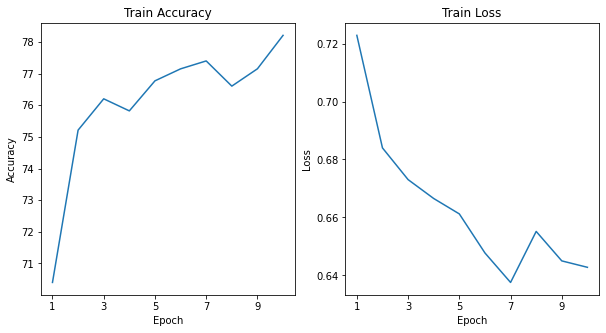

In [43]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.plot(x,train_accuracy_list) 

plt.subplot(1,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Train Loss')
plt.plot(x,train_loss_list) 

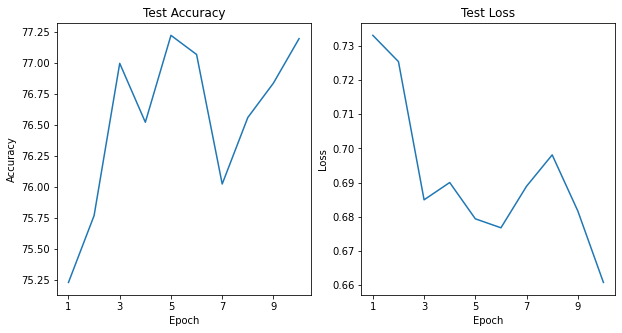

In [44]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.plot(x,test_accuracy_list) 

plt.subplot(1,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Test Loss')
plt.plot(x,test_loss_list) 

In [55]:

model = FNN(28*28,100,10)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss()

train_accuracy_list=[]
test_accuracy_list=[]
train_loss_list=[]
test_loss_list=[]


for i in range(epochs):
    running_loss =0

    correct = 0
    total = 0
    count=0
    accuracy=[]
    for (x,y) in train_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    train_loss= running_loss / len(train_loader)
    train_loss_list.append(train_loss.cpu().detach().numpy())
    train_accuracy= sum(accuracy) / count
    train_accuracy_list.append(train_accuracy)
    print("train / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,train_loss,train_accuracy))     
    
    running_loss =0
    correct = 0
    total = 0
    count=0
    accuracy=[]
    
    for (x,y) in test_loader:
        x=x.view(-1, 28 * 28).requires_grad_().to(device)
        y=y.to(device)
        
        optimizer.zero_grad()
        output=model(x)
        loss= criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        _, predicted = torch.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum()
        accuracy.append(100 * correct.item() / total)
        count+=1
    
    test_loss= running_loss / len(test_loader)
    test_loss_list.append(test_loss.cpu().detach().numpy())
    test_accuracy= sum(accuracy) / count
    test_accuracy_list.append(test_accuracy)
    print("test / epoch: {}, Loss: {}, Accuracy: {}".format(i+1,loss.item(),test_accuracy))    

train / epoch: 1, Loss: 0.5901840329170227, Accuracy: 75.78886560077629
test / epoch: 1, Loss: 0.712878942489624, Accuracy: 80.05831709799516
train / epoch: 2, Loss: 0.5530176758766174, Accuracy: 80.42054040050016
test / epoch: 2, Loss: 0.6258409023284912, Accuracy: 80.86747104793729
train / epoch: 3, Loss: 0.5460736155509949, Accuracy: 79.73849312070473
test / epoch: 3, Loss: 0.6976034045219421, Accuracy: 80.61331173566991
train / epoch: 4, Loss: 0.535751223564148, Accuracy: 80.85942285588389
test / epoch: 4, Loss: 0.7162186503410339, Accuracy: 80.73921912183752
train / epoch: 5, Loss: 0.5383886098861694, Accuracy: 80.60272409278386
test / epoch: 5, Loss: 0.6921136379241943, Accuracy: 79.7435041958778
train / epoch: 6, Loss: 0.5333700776100159, Accuracy: 80.48406962295401
test / epoch: 6, Loss: 0.6535594463348389, Accuracy: 80.36338197243789
train / epoch: 7, Loss: 0.5352500081062317, Accuracy: 80.50491175806884
test / epoch: 7, Loss: 0.6518372893333435, Accuracy: 81.15079441946756
tr

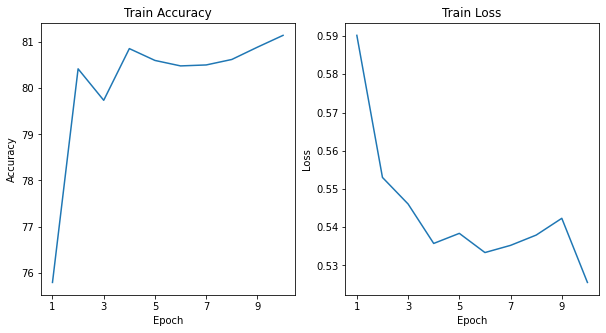

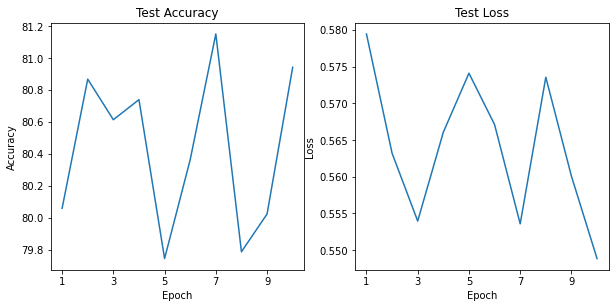

In [57]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.plot(x,train_accuracy_list) 

plt.subplot(1,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Train Loss')
plt.plot(x,train_loss_list) 

plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.plot(x,test_accuracy_list) 

plt.subplot(2,2,2)
x=np.arange(1,11)
plt.xticks(range(1,11,2))
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Test Loss')
plt.plot(x,test_loss_list) 